In [ ]:
# 헤더설정
'''
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
Accept-Encoding: gzip, deflate, br
Accept-Language: ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7
Cache-Control: max-age=0
Connection: keep-alive
Cookie: JSESSIONID=327097CCFFC607F1C4D85EE607B6ADE9; _BS_GUUID=WEg8yYTvFzinlgNnxWyOJSLpbk8ZF6bCKsLiqEO6; _ga=GA1.1.347037494.1661679501; _TRK_UID=321f0265027573fc9e01103701e10f35:1:0:1661679500913; _TRK_SID=f50f0f2706314e79c91a959f0d526808; _TRK_CQ=%3Fshow_no=84%26check_no=77%26c_relation=115%26c_relation2=245; _ga_QTVN4CJBCN=GS1.1.1661679500.1.1.1661679701.0.0.0; _TRK_EX=4
Host: www.startup-plus.kr
sec-ch-ua: "Chromium";v="104", " Not A;Brand";v="99", "Google Chrome";v="104"
sec-ch-ua-mobile: ?0
sec-ch-ua-platform: "macOS"
Sec-Fetch-Dest: document
Sec-Fetch-Mode: navigate
Sec-Fetch-Site: none
Sec-Fetch-User: ?1
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36
'''

In [ ]:
# test

headers = {
        "Cookie": "JSESSIONID=327097CCFFC607F1C4D85EE607B6ADE9; _BS_GUUID=WEg8yYTvFzinlgNnxWyOJSLpbk8ZF6bCKsLiqEO6; _ga=GA1.1.347037494.1661679501; _TRK_UID=321f0265027573fc9e01103701e10f35:1:0:1661679500913; _TRK_SID=f50f0f2706314e79c91a959f0d526808; _TRK_CQ=%3Fshow_no=84%26check_no=77%26c_relation=115%26c_relation2=245; _ga_QTVN4CJBCN=GS1.1.1661679500.1.1.1661679701.0.0.0; _TRK_EX=4",
        "Host" : "www.startup-plus.kr",
        "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36" 
}

res = requests.get("https://www.startup-plus.kr/cms_for_portal/process/company/view.do?c_no={}&show_no=84&check_no=77&c_relation=115&c_relation2=245&t1=&nowPage=1".format(number), headers=headers)

res

soup = bs4.BeautifulSoup(res.text)

li_elements = soup.select("section.find-startup__detail")  # 잘 작동

li_elements[0].find('div', class_ = 'company-center').find('p').text.strip()

li_elements[0].find('div', class_ = 'company__wrap').find_all('p')[-1].text.strip() 

for idx, i in enumerate(li_elements[0].find_all("p")):
    print(idx, i)

li_elements[0].find_all("p")[7].text.strip() # 설립일
li_elements[0].find_all("p")[9].text.strip() # 업종
li_elements[0].find_all("p")[-1].text.strip() # 주소

In [ ]:
## 전체 크롤링 코드 

import random
import requests
import bs4
import time

# header
headers = {
        "Cookie": "JSESSIONID=327097CCFFC607F1C4D85EE607B6ADE9; _BS_GUUID=WEg8yYTvFzinlgNnxWyOJSLpbk8ZF6bCKsLiqEO6; _ga=GA1.1.347037494.1661679501; _TRK_UID=321f0265027573fc9e01103701e10f35:1:0:1661679500913; _TRK_SID=f50f0f2706314e79c91a959f0d526808; _TRK_CQ=%3Fshow_no=84%26check_no=77%26c_relation=115%26c_relation2=245; _ga_QTVN4CJBCN=GS1.1.1661679500.1.1.1661679701.0.0.0; _TRK_EX=4",
        "Host" : "www.startup-plus.kr",
        "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36" 
}

# company_number
numbers = [i + 10000 for i in range(20000)]  

# url
url = "https://www.startup-plus.kr/cms_for_portal/process/company/view.do?c_no={}&show_no=84&check_no=77&c_relation=115&c_relation2=245&t1=&nowPage=1"


comp_li = []

for number in numbers :

    
    
    try : 
        # request.get
        res = requests.get(url.format(number), headers=headers)

        # soup 
        soup = bs4.BeautifulSoup(res.text)


        elements = soup.select("section.find-startup__detail")

        company_address  = elements[0].find('div', class_ = 'company__wrap').find_all('p')[-1].text.strip() # 주소


        if company_address == '' :
            continue



        company_name = elements[0].find('div', class_ = 'company-center').find('p').text.strip()
        company_establish = elements[0].find('div', class_ = 'company__wrap').find_all('p')[7].text.strip()
        company_category  = elements[0].find('div', class_ = 'company__wrap').find_all('p')[9].text.strip()


        print(number, res)
        print(company_name, company_establish, company_category, company_address)

        comp_li.append([company_name, company_establish, company_category, company_address])
        
    except :
        print('error happens')
        
    
    time.sleep(0.2+random.random()) 

In [ ]:
# to DataFrame

import pandas as pd

data = pd.DataFrame(comp_li, columns=['회사명', '설립일', '업종', '주소'])

data.info()

data.to_csv('data_end.csv', index=False)

### preprocessing

In [ ]:
df.info()

In [ ]:
df[df['회사명'].isna()].index

In [ ]:
df = df.dropna(subset=['회사명'])

In [ ]:
df.info()

In [ ]:
df_seoul = df[df['주소'].str.contains('서울')]

df_seoul = df_seoul.reset_index(drop='True')

In [ ]:
df_seoul['주소']

In [ ]:
def pre(x) :
    
    if ',' in x :
         return x.split(',')[0]
    
    return x

df_seoul['query'] = df_seoul['주소'].apply(lambda x : pre(x))

In [ ]:
df_seoul['query']

In [ ]:
df_seoul

### 도로명주소 : 행정동 변환

In [ ]:
# res['documents'][0]['address']['h_code']

# res['documents'][0]['address']['region_3depth_h_name']

# res['documents'][0]['address']['x'], res['documents'][0]['address']['y']

In [ ]:
import requests
import numpy as np

headers = {"Authorization": "KakaoAK b9dbc4dea1a2b14b5e766a703eb89f11"}


dong_li = []

def get_address(x):

    url = f'https://dapi.kakao.com/v2/local/search/address.json?query={x}'

    # return requests.get(url, headers = headers).json()

    try :
        dong_number = res['h_code']
        dong = res['region_3depth_h_name']
        dong_do = res['x'], res['y']
        
        
        dong_li.append([dong_number, dong, dong_do])
        
        
    
    except :
        
        dong_li.append([np.NaN, np.NaN, np.NaN])
    

In [ ]:
from tqdm import tqdm


for i in tqdm(list(df_seoul['query'])):
    
    get_address(i)
    

In [ ]:
dong_data = pd.DataFrame(dong_li, columns=['행정동번호', '행정동', '위경도'])

df_seoul_merge = pd.concat([df_seoul, dong_data], axis=1)

In [ ]:
df_seoul_merge_processing = df_seoul_merge.dropna(subset=['행정동번호'])

In [ ]:
df_seoul_merge_processing.info()

In [ ]:
df_seoul_merge_processing.to_csv('df_seoul_merge_processing.csv', index=False)

### 분석 시작

In [47]:
import pandas as pd

data = pd.read_csv('df_seoul_merge_processing.csv')

In [48]:
data_start_up = data.groupby(by='행정동')['주소'].count()

In [49]:
data_start_up = data_start_up.reset_index()
data_start_up.columns = ['행정동', '스타트업 수']

In [50]:
data_start_up

,행정동,스타트업 수
0,가락1동,15
1,가락2동,3
2,가락본동,20
3,가산동,253
4,가양1동,99
...,...,...
340,효창동,2
341,후암동,5
342,휘경1동,2
343,휘경2동,2


In [54]:
data_start_up.isna().sum()

행정동       0
스타트업 수    0
dtype: int64

### 지도 그리기

In [2]:
import geopandas as gpd
# map = gpd.read_file('seoul_dong_2021year_wgs84.shp')

In [51]:
map.columns

Index(['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry'], dtype='object')

In [52]:
print(set(data_start_up['행정동'].unique()) - set(map['ADM_DR_NM'].unique()))

{'구즉동', '금호2.3가동', '상일2동', '상일1동', '종로1.2.3.4가동', '상계6.7동', '중계2.3동', '상계3.4동', '종로5.6가동', '배곧2동'}


In [55]:
data_start_up = data_start_up.drop(data_start_up[data_start_up['행정동'] == '구즉동'].index).reset_index(drop=True)

In [56]:
# 배곧2동
data_start_up = data_start_up.drop(data_start_up[data_start_up['행정동'] == '배곧2동'].index).reset_index(drop=True)

In [58]:
data_start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정동     343 non-null    object
 1   스타트업 수  343 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [60]:
data_start_up[data_start_up['행정동'].str.contains('상일')]

,행정동,스타트업 수
140,상일1동,1
141,상일2동,3


In [62]:
# . > · repleace and 상일동

def dot_re(x) :

    if '.' in x :
        return x.replace('.','·')

    elif '상일' in x :
        return '상일동'
    
    return x

data_start_up['행정동'] = data_start_up['행정동'].apply(lambda x : dot_re(x))

In [64]:
print(set(data_start_up['행정동'].unique()) - set(map['ADM_DR_NM'].unique()))

set()


In [65]:
data_start_up[data_start_up['행정동'].str.contains('상일')]

,행정동,스타트업 수
140,상일동,1
141,상일동,3


In [68]:
data_start_up = data_start_up.groupby(by='행정동')['스타트업 수'].sum().reset_index()

In [71]:
data_start_up[data_start_up['행정동'].str.contains('상일')]

,행정동,스타트업 수
140,상일동,4


In [81]:
merge_data = pd.merge(map, data_start_up, left_on = 'ADM_DR_NM', right_on = '행정동', how = 'left')

In [82]:
merge_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  425 non-null    object  
 1   ADM_DR_CD  425 non-null    object  
 2   ADM_DR_NM  425 non-null    object  
 3   geometry   425 non-null    geometry
 4   행정동        343 non-null    object  
 5   스타트업 수     343 non-null    float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 23.2+ KB


In [85]:
# df.fillna({'특정 컬럼명': 0})  

merge_data = merge_data.fillna({'스타트업 수': 0})  

In [86]:
merge_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  425 non-null    object  
 1   ADM_DR_CD  425 non-null    object  
 2   ADM_DR_NM  425 non-null    object  
 3   geometry   425 non-null    geometry
 4   행정동        343 non-null    object  
 5   스타트업 수     425 non-null    float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 23.2+ KB


In [87]:
def make_chorpleth(data, column) :
    fig, ax = plt.subplots(1, figsize = (15,15))
    data.plot(column = column, cmap = 'YlOrRd_r', 
                    linewidth = 1,edgecolor = '0.9',
                    ax = ax, legend = True)
    ax.axis('off');

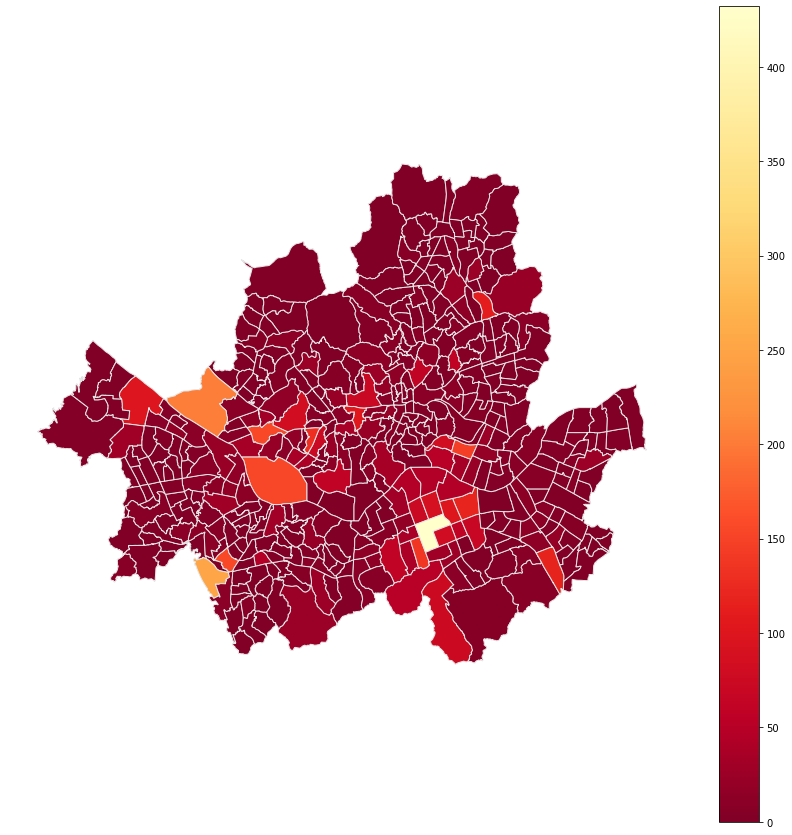

In [89]:
import matplotlib.pyplot as plt
make_chorpleth(merge_data,'스타트업 수')

In [91]:
## 데이터 내보내기

data_start_up.to_csv('행정동별스타트업수.csv', index=False)